<a href="https://colab.research.google.com/github/Mansi-Kundariya/ML_Sem6/blob/main/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lab : 2***

# **Data Preprocessing and Feature Selection**



**1.    Steps for Data Transformation**



In [22]:
# 1. Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 2. Load data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Data_for_Transformation.csv')
print("\nData : \n", ds) 

# 3: Seprate Input and Output attributes
X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(X)
Y = ds.iloc[:, -1].values
print("\n---------------------------Output-------------------------------------")
print(Y)

X_new = ds.iloc[:, 1:3].values
print("\n\n X for transformation : \n", X_new)

# 4 : Perform scaling on age and salary
s = MinMaxScaler()
X_scaled = s.fit_transform(X_new)
print("\n\n Scaled X : \n", X_scaled)

# 5 : Perform standardization on age and salary
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data : 
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

---------------------------Input-------------------------------------
[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 38 61000]
 ['Germany' 40 68000]
 ['France' 35 58000]
 ['Spain' 39 52000]
 ['France' 48 79000]
 ['Germany' 50 83000]
 ['France' 37 67000]
 ['Spain' 45 55000]]

---------------------------Output-------------------------------------
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No']


 X 

**2 Steps for Handling Categorical Data**

In [23]:
# 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# 2: Load Data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Data_for_Categorical_Values.csv')
print("\nData :\n",ds)
print("\nData statistics\n",ds.describe())

# 3: Seprate Input and Output attributes
X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(X)
Y = ds.iloc[:, -1].values
print("\n---------------------------Output-------------------------------------")
print(Y)

#  4a: Apply LabelEncoder on the data to convert country names into numeric values
le = LabelEncoder()
X[ : ,0] = le.fit_transform(X[ : ,0])
print("\n\nInput : \n", X)

# 4b: Use dummy variables from pandas library to create one column for each country
dummy = pd.get_dummies(ds['Country'])
print("\n\n Dummy : \n ", dummy)
data = ds.drop(['Country', 'Purchased'], axis=1)
data = pd.concat([dummy,data], axis=1)
print("\n\nFinal Dataset : \n", data)

    # One Hot Encoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(ds.Country.values.reshape(-1,1)).toarray()
print("\n\nOne Hot Encoding : \n", x)

dfOneHot = pd.DataFrame(x, columns = ["Country_"+str(int(i)) for i in range(ds.shape[1]-1)])
df = pd.concat([ds, dfOneHot], axis=1)
df = df.drop(['Country'], axis=1)
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data :
     Country  Age  Salary Purchased
0    France   44   72000        No
1     Spain   27   48000       Yes
2   Germany   30   54000        No
3     Spain   38   61000        No
4   Germany   40   68000       Yes
5    France   35   58000       Yes
6     Spain   39   52000        No
7    France   48   79000       Yes
8   Germany   50   83000        No
9    France   37   67000       Yes
10    Spain   45   55000        No

Data statistics
              Age        Salary
count  11.000000     11.000000
mean   39.363636  63363.636364
std     7.131237  11386.594989
min    27.000000  48000.000000
25%    36.000000  54500.000000
50%    39.000000  61000.000000
75%    44.500000  70000.000000
max    50.000000  83000.000000

---------------------------Input-------------------------------------
[['France' 44 72000]
 ['Spain' 27 48000]
 ['Germany' 30 54000]
 ['Spain' 3

**3 Steps for Handling the missing value**

In [24]:
# 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 2: Load Data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Data_for_Missing_Values.csv')
print("\nData :\n",ds)
print("\nData statistics\n",ds.describe())

# 3: Seprate Input and Output attributes
X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(X)
Y = ds.iloc[:, -1].values
print("\n---------------------------Output-------------------------------------")
print(Y)

#  4a. Removing the row with all null values
ds.dropna(axis=0, how='all', inplace=True)
print("\n\n New Data : ", ds)

# 4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)

print("\n")
updated_df = ds;
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()
print("\n\nDatasets : \n", ds)

print("\n")
updated_df = ds;
updated_df['Salary']=updated_df['Salary'].fillna(updated_df['Salary'].mean())
updated_df.info()
print("\n\nDatasets : \n", ds)

new_X = ds.iloc[:,  :-1].values
print("\n---------------------------New Input-------------------------------------")
print(new_X)
new_Y = ds.iloc[:, -1].values
print("\n---------------------------New Output-------------------------------------")
print(new_Y)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000

---------------------------Input-------------------------------------
[['France' 44

In [25]:
# 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 2: Load Data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Data_for_Missing_Values.csv')
print("\nData :\n",ds)
print("\nData statistics\n",ds.describe())

# 3: Seprate Input and Output attributes
X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(X)
Y = ds.iloc[:, -1].values
print("\n---------------------------Output-------------------------------------")
print(Y)

#  4a. Removing the row with all null values
ds.dropna(axis=0, how='all', inplace=True)
print("\n\n New Data : ", ds)

# 4b. Removing the row with any one null values
#datasets.dropna(axis=0,how='any',inplace=True)

# 4c.  Imputation (Replacing null values with mean value of that attribute)
new_X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(new_X)
new_Y = ds.iloc[:, -1].values
print("\n---------------------------Output-------------------------------------")
print(new_Y)

updated_df['Age'].fillna(updated_df['Age'].mean())
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
imputer = imputer.fit(new_X[:, 1:3])
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
print("\n\nNew Input with Mean Value for Nan : \n\n", new_X)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data :
     Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4       NaN   NaN      NaN       NaN
5   Germany  40.0      NaN       Yes
6    France  35.0  58000.0       Yes
7     Spain   NaN  52000.0        No
8    France  48.0  79000.0       Yes
9   Germany  50.0  83000.0        No
10   France  37.0  67000.0       Yes
11    Spain  45.0  55000.0        No

Data statistics
              Age        Salary
count  10.000000     10.000000
mean   39.400000  62900.000000
std     7.515909  11892.574714
min    27.000000  48000.000000
25%    35.500000  54250.000000
50%    39.000000  59500.000000
75%    44.750000  70750.000000
max    50.000000  83000.000000

---------------------------Input-------------------------------------
[['France' 44

**4 Correlation**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data : 
     X1   X2  X3   X4  Y
0    1    1   4   -2  1
1    2    4   5   -4  1
2    3    9   6    3  0
3    4   16   7    4  0
4    5   25   8   25  1
5    6   36   9   76  0
6    7   49  10   34  1
7    8   64  11  346  0
8    9   81  12   67  0
9   10  100  13    3  0
10  11  121  14  355  1
11  12  144  15   88  1
12  13  169  16    2  0
13  14  196  17    1  1


Dataset : 
     X1   X2  X3   X4
0    1    1   4   -2
1    2    4   5   -4
2    3    9   6    3
3    4   16   7    4
4    5   25   8   25
5    6   36   9   76
6    7   49  10   34
7    8   64  11  346
8    9   81  12   67
9   10  100  13    3
10  11  121  14  355
11  12  144  15   88
12  13  169  16    2
13  14  196  17    1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  --

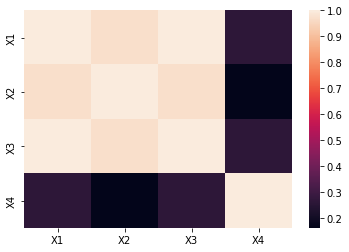

In [26]:
# 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns


# 2: Load Data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Data_for_Correlation.csv')
# print("\nData :\n",ds)
# print("\nData statistics\n",ds.describe())
print("\n\nData : \n", ds)

# 3: Removing the Class Label entry (Y)
ds = ds.iloc[:, :-1]
print("\n\nDataset : \n", ds)

print("\n\n")
ds.info()

# 4: Selecting features based on correlation Generating the correlation matrix
corr = ds.corr()
print("\n\n")
corr.head()

# 5: Generating the correlation heatmap
sns.heatmap(corr)


In [27]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

In [28]:
selected_columns = ds.columns[columns]
selected_columns.shape

(2,)

In [29]:
ds = ds[selected_columns]
print(ds)

    X1   X4
0    1   -2
1    2   -4
2    3    3
3    4    4
4    5   25
5    6   76
6    7   34
7    8  346
8    9   67
9   10    3
10  11  355
11  12   88
12  13    2
13  14    1


# **Exercise:**

In [35]:
# 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

In [33]:
# 2: Load Data
from google.colab import drive
drive.mount('/content/drive')

ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Exercise-CarData.csv')
print("\nData :\n",ds)
print("\nData statistics\n",ds.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Data :
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86  

In [38]:
# 3: Seprate Input and Output attributes
X = ds.iloc[:,  :-1].values
print("\n---------------------------Input-------------------------------------")
print(X)
Y = ds.iloc[:, -1].values
print("\n---------------------------Output------------------------------------")
print(Y)


---------------------------Input-------------------------------------
[[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]

---------------------------Output------------------------------------
[1165 1165 1165 ... 1015 1015 1114]


In [39]:
X_new = ds.iloc[:, 1:3].values
print("\n\nX for transformation : \n", X_new)



X for transformation : 
 [[13500.    23.]
 [13750.    23.]
 [13950.    24.]
 ...
 [ 8500.    nan]
 [ 7250.    70.]
 [ 6950.    76.]]


In [40]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.3250444  0.27848101]
 [0.3339254  0.27848101]
 [0.3410302  0.29113924]
 ...
 [0.14742451        nan]
 [0.10301954 0.87341772]
 [0.09236234 0.94936709]]


In [41]:
std = StandardScaler()
X_std = std.fit_transform(X_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[ 0.76376268 -1.75818903]
 [ 0.83271485 -1.75818903]
 [ 0.88787659 -1.70437596]
 ...
 [-0.6152808          nan]
 [-0.96004167  0.7710253 ]
 [-1.04278428  1.09390373]]


In [43]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lab2_Exercise-CarData.csv')
print("\nData :\n",ds)
print("\nData statistics\n",ds.describe())


Data :
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weigh

In [44]:
ds.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",ds)


New Data :       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  We

In [45]:
new_X = ds.iloc[:, :-1].values
# Only last column
new_Y = ds.iloc[:, -1].values
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# Fitting the data, function learns the stats
imputer = imputer.fit(new_X[:, 1:3])
# fit_transform() will execute those stats on the input ie. X[:, 1:3]
new_X[:, 1:3] = imputer.transform(new_X[:, 1:3])
# filling the missing value with mean
print("\n\nNew Input with Mean Value for NaN : \n\n", new_X)



New Input with Mean Value for NaN : 

 [[0 13500.0 23.0 ... 0 2000 'three']
 [1 13750.0 23.0 ... 0 2000 '3']
 [2 13950.0 24.0 ... 0 2000 '3']
 ...
 [1433 8500.0 55.67215568862275 ... 0 1300 '3']
 [1434 7250.0 70.0 ... 0 1300 '3']
 [1435 6950.0 76.0 ... 0 1600 '5']]
